In [3]:
from keras.models import Sequential
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.svm import SVC as SVM
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler,
                                  PowerTransformer, QuantileTransformer, Normalizer)
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import plot_tree
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
data = pd.read_excel('practice_lab_3.xlsx')
columns = list(data.columns)
def qualitative_to_0_1(data, column, value_to_be_1):
    mask = data[column].values == value_to_be_1
    data.loc[mask, column] = 1
    data.loc[~mask, column] = 0
qualitative_to_0_1(data, 'Gender', 'Female')
qualitative_to_0_1(data, 'Married', 'Yes')
qualitative_to_0_1(data, 'Self_Employed', 'Yes')
qualitative_to_0_1(data, 'Education', 'Graduate')
qualitative_to_0_1(data, 'Loan_Status', 'Y')
data

ModuleNotFoundError: No module named 'keras'

In [138]:
cat_feature = pd.Categorical(data.Property_Area)
one_hot = pd.get_dummies(cat_feature)
data = pd.concat([data, one_hot], axis = 1)
data = data.drop(columns = ['Property_Area'])
data['Loan_Status'] = data['Loan_Status'].astype(int)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
0,0,0,0,1,0,5849,0.0,146.412162,360,1,1,0,0,1
1,0,1,1,1,0,4583,1508.0,128.000000,360,1,0,1,0,0
2,0,1,0,1,1,3000,0.0,66.000000,360,1,1,0,0,1
3,0,1,0,0,0,2583,2358.0,120.000000,360,1,1,0,0,1
4,0,0,0,1,0,6000,0.0,141.000000,360,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.000000,360,1,1,1,0,0
610,0,1,3,1,0,4106,0.0,40.000000,180,1,1,1,0,0
611,0,1,1,1,0,8072,240.0,253.000000,360,1,1,0,0,1
612,0,1,2,1,0,7583,0.0,187.000000,360,1,1,0,0,1


In [139]:
features = data.columns
vals = data.values.astype(np.float64)
y = data['Loan_Status'].values
X = data.drop(columns = ['Loan_Status']).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [140]:
models = [kNN(n_neighbors = 4, weights = 'distance'), SVM(kernel = 'sigmoid')]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))

[[ 9 29]
 [14 71]]
[[ 7 31]
 [20 65]]


In [146]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
models = [kNN(n_neighbors = 4, weights = 'distance'), SVM(kernel = 'sigmoid')]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

[[15 23]
 [11 74]]
[[11 27]
 [11 74]]


[[10 28]
 [ 4 81]]


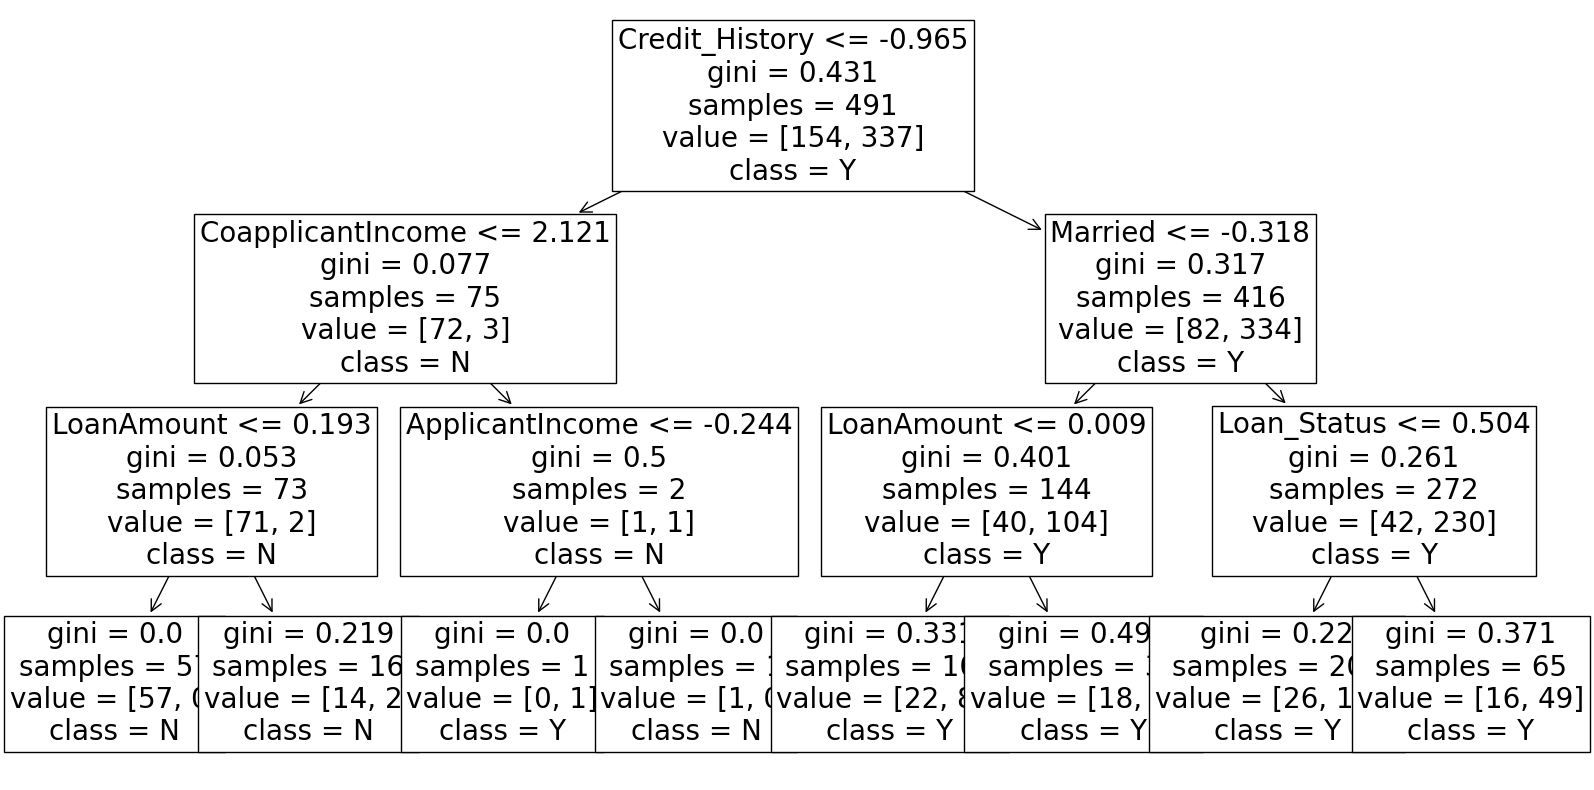

In [145]:
model = DT(max_depth = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize = (20, 10))
tree_vis = plot_tree(model, feature_names = data.columns[:-1].to_list(), class_names = ['N', 'Y'], fontsize = 20)

In [130]:
data_breast_cancer = load_breast_cancer()
breast_cancer = pd.DataFrame(data = data_breast_cancer.data, columns = data_breast_cancer.feature_names)
result = pd.Series(data_breast_cancer.target)
result.name = "Chory"

In [127]:
features = breast_cancer.columns
vals = breast_cancer.values

In [162]:
y2 = result.values
X2 = features
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2)
model_breast_cancer = DT(max_depth = 5)
model_breast_cancer.fit(X_train2, y_train2)
y_pred2 = model_breast_cancer.predict(X_test2)
accuracy = accuracy_score(y_test2, y_pred2)
accuracy

0.8455284552845529